<a href="https://colab.research.google.com/github/FilipeBarnabe/reinforcement_learning_trading/blob/main/tasi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines==2.10.0 gym-anytrading==1.2.0 gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gym[all] -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
    Running setup.py install for mujoco-py ... error
  Rolling back uninstall of mujoco-py
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py-2.1.2.14.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py-2.1.2.14.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-db4rwcaw/mujoco-py_d30f59da4a3f4273a3d8e63ffb94ad01

In [ ]:
import gym
import gym_anytrading

from stable_baselines.common.policies import MlpLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
df = pd.read_csv("/content/gmedata.csv")
df ["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
1,2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2,2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
3,2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
4,2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
env = gym.make("stocks-v0", df=df, frame_bound=(10,100), window_size=5)

In [ ]:
env.prices

array([137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,  91.71,
        44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,  51.1 ,
        51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  , 225.  ,
       325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,  39.12,
        39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,  18.08,
        18.36,  17.37,  17.25,  18.84,  19.26,  19.38,  20.99,  20.15,
        20.57,  19.46,  15.53,  15.63,  14.83,  13.85,  13.85,  12.72,
        13.31,  14.12,  13.66,  16.94,  16.35,  16.9 ,  16.12,  16.58,
        15.8 ,  16.56,  16.08,  14.75,  13.67,  13.9 ,  12.71,  12.46,
        11.57,  11.63,  12.06,  11.01,  11.13,  11.75,  11.1 ,  11.49,
        11.86,  11.45,  10.91,  11.57,  10.75,  10.47,  11.73,  11.82,
        12.69,  13.45,  15.  ,  14.91,  14.1 ,  13.86,  13.91])

info {'total_reward': 142.11, 'total_profit': 0.5436618125356009, 'position': 1}


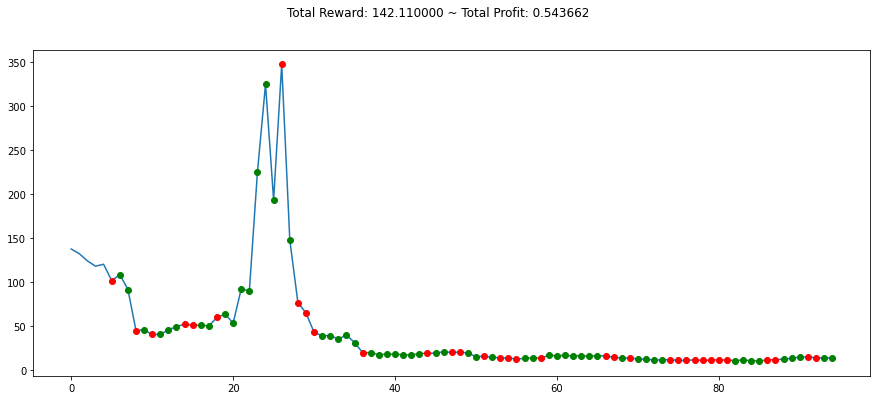

In [ ]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
# Only has two action buy and sell 
env.action_space

Discrete(2)

In [ ]:
env_maker =  lambda: gym.make("stocks-v0", df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C("MlpLstmPolicy", env, verbose=1) 
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




---------------------------------
| explained_variance | -0.00121 |
| fps                | 23       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 16.2     |
---------------------------------
----------------------------------
| explained_variance | -1.99e+03 |
| fps                | 446       |
| nupdates           | 100       |
| policy_entropy     | 0.692     |
| total_timesteps    | 500       |
| value_loss         | 0.0017    |
----------------------------------
---------------------------------
| explained_variance | -0.00218 |
| fps                | 489      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 10.7     |
---------------------------------
---------------------------------
| explained_variance | -0.099   |
| fps                | 510      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| tota

info {'total_reward': 0.0, 'total_profit': 1.1681198209718668, 'position': 1}


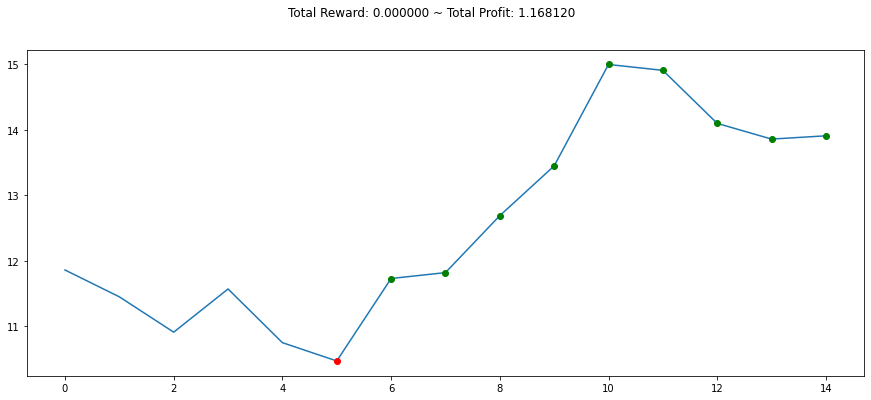

In [ ]:
env = gym.make("stocks-v0", df=df, frame_bound=(90,100), window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print("info", info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()